# I DON'T LOVE THIS AS A VISUALIATION TUTORIAL. IT'S MORE OF AN EDA EXERCISE
# AND KIND OF A MEANDERING ONE AT THAT

# Online Retails Purchase

### Index

[5. Section 5](#s5)

Another attempt to get internal links in this notebook to work on github    

[6. Section 6](#s6)   


<a href='#s6'>6. Section 6</a>

### Introduction:



### Step 1. Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Online_Retail/Online_Retail.csv).

### Step 3. Assign it to a variable called online_rt
Note: if you receive a utf-8 decode error, set `encoding = 'latin1'` in `pd.read_csv()`.

In [3]:
url='https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Online_Retail/Online_Retail.csv'
online_rt=pd.read_csv(url, encoding = 'latin1')

In [4]:
online_rt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
online_rt.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/10 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/10 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/10 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/10 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/10 8:34,1.69,13047.0,United Kingdom


### Step 4. Create a histogram with the 10 countries that have the most 'Quantity' ordered except UK

In [30]:
top10_df = \
 (
    online_rt
    .groupby('Country')
    .Quantity
    .sum()
    .nlargest(11)
    .drop('United Kingdom', axis=0)
    .to_frame()
    .reset_index()

)

top10_df

,Country,Quantity
0,Netherlands,200128
1,EIRE,142637
2,Germany,117448
3,France,110480
4,Australia,83653
5,Sweden,35637
6,Switzerland,30325
7,Spain,26824
8,Japan,25218
9,Belgium,23152


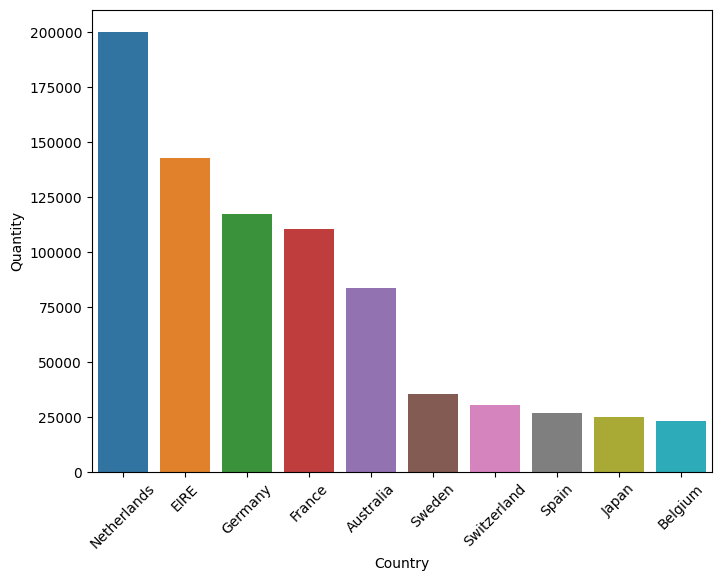

In [39]:
fig, ax = plt.subplots(figsize=(8,6))
g = sns.barplot(data=top10_df,x='Country', y='Quantity', ax=ax) # Assign resulting axes object to 'g'
g.set_xticklabels(labels=g.get_xticklabels(), rotation = 45)    # Use getters and setters to reorient to 45 degrees
plt.show()

<a id="s5"></a>

<a id="s5"></a>
### Step 5.  Exclude negative Quantity entries

In [43]:
df_gt0 = online_rt.query('Quantity >= 0')

<a id="s6"></a>

### Step 6. Create a scatterplot with the Quantity per UnitPrice by CustomerID for the top 3 Countries (except UK)

In [55]:
top3 = top10_df.nlargest(3, columns='Quantity')
top3

,Country,Quantity
0,Netherlands,200128
1,EIRE,142637
2,Germany,117448


<Axes: xlabel='CustomerID', ylabel='Q_per_UP'>

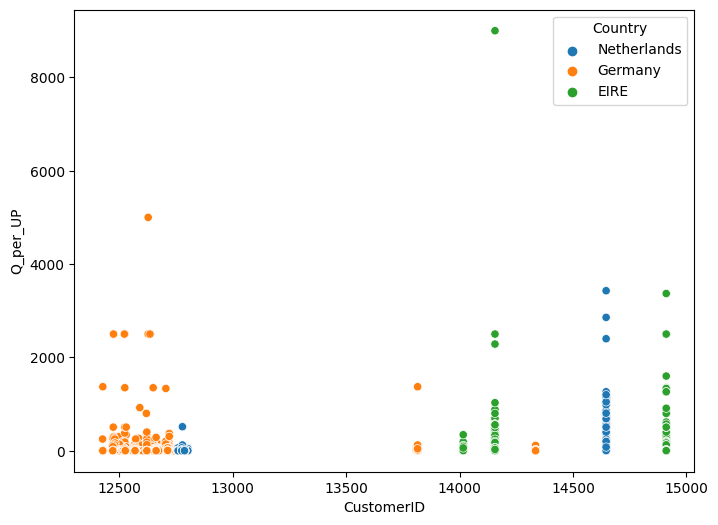

In [70]:
data = df_gt0.loc[df_gt0.Country.isin(top3.Country), :]
data = data.assign(Q_per_UP = lambda x: x.Quantity/x.UnitPrice)
fig, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(data=data, x='CustomerID', y='Q_per_UP', hue='Country', ax=ax)

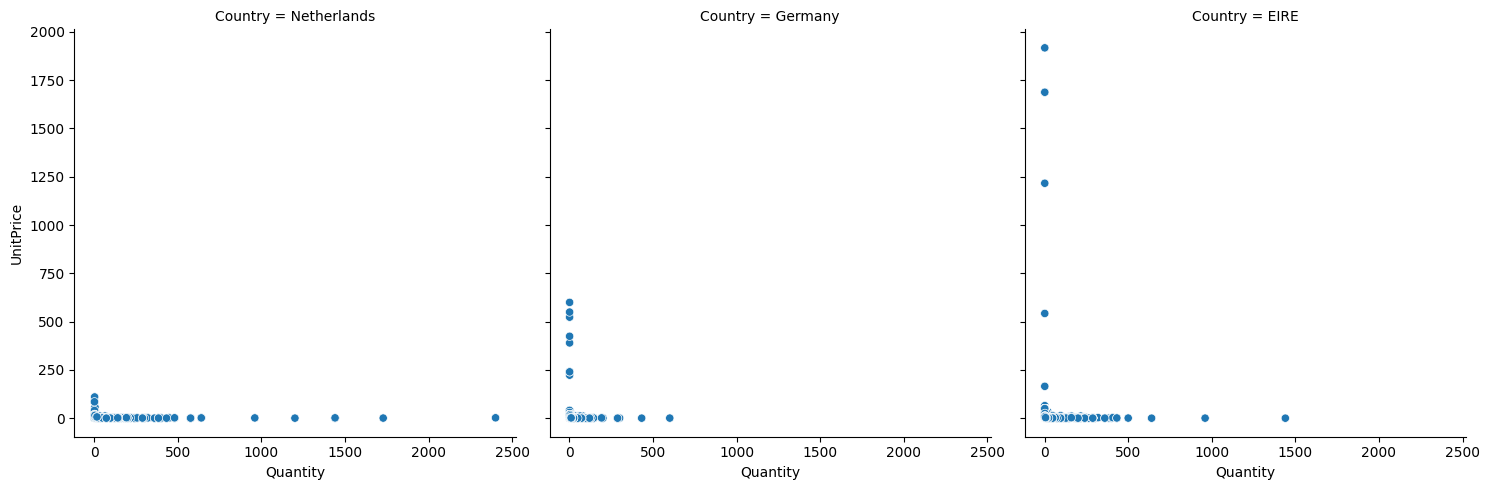

In [78]:
### MORE LIKE WHAT THEY WERE LOOKING FOR
g=sns.FacetGrid(data, col='Country', height=5, aspect=1)
g.map_dataframe(sns.scatterplot, x='Quantity', y='UnitPrice', hue='Country')

In [83]:
data.query('Country == "Germany"').nlargest(10, 'Quantity')


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Q_per_UP
187574,552978,15036,ASSORTED COLOURS SILK FAN,600,5/12/11 14:46,0.65,12590.0,Germany,923.076923
383671,570082,23379,PACK OF 12 RED APPLE TISSUES,432,10/7/11 11:19,0.32,12524.0,Germany,1350.000000
229429,557055,15036,ASSORTED COLOURS SILK FAN,300,6/16/11 14:45,0.83,12621.0,Germany,361.445783
93216,544281,22585,PACK OF 6 BIRDY GIFT TAGS,288,2/17/11 12:23,1.06,12500.0,Germany,271.698113
163779,550625,22893,MINI CAKE STAND T-LIGHT HOLDER,288,4/19/11 14:02,0.36,12619.0,Germany,800.000000
233237,557466,84568,GIRLS ALPHABET IRON ON PATCHES,288,6/20/11 13:08,0.21,13815.0,Germany,1371.428571
479095,577135,84598,BOYS ALPHABET IRON ON PATCHES,288,11/18/11 8:56,0.21,12427.0,Germany,1371.428571
101819,544933,10135,COLOURING PENCILS BROWN TUBE,200,2/25/11 8:44,1.06,12633.0,Germany,188.679245
381790,569893,16045,POPART WOODEN PENCILS ASST,200,10/6/11 15:51,0.04,12627.0,Germany,5000.000000
163641,550620,84945,MULTI COLOUR SILVER T-LIGHT HOLDER,192,4/19/11 13:39,0.72,12585.0,Germany,266.666667


### Step 7. Investigate why the previous results look so uninformative.

This section might seem a bit tedious to go through. But I've thought of it as some kind of a simulation of problems one might encounter when dealing with data and other people. Besides there is a prize at the end (i.e. Section 8).

(But feel free to jump right ahead into Section 8 if you want; it doesn't require that you finish this section.)

#### Step 7.1 Look at the first line of code in Step 6. And try to figure out if it leads to any kind of problem.
##### Step 7.1.1 Display the first few rows of that DataFrame.

##### Step 7.1.2 Think about what that piece of code does and display the dtype of `UnitPrice`

##### Step 7.1.3 Pull data from `online_rt`for `CustomerID`s 12346.0 and 12347.0.

#### Step 7.2 Reinterpreting the initial problem.

To reiterate the question that we were dealing with:  
"Create a scatterplot with the Quantity per UnitPrice by CustomerID for the top 3 Countries"

The question is open to a set of different interpretations.
We need to disambiguate.

We could do a single plot by looking at all the data from the top 3 countries.
Or we could do one plot per country. To keep things consistent with the rest of the exercise,
let's stick to the latter oprion. So that's settled.

But "top 3 countries" with respect to what? Two answers suggest themselves:
Total sales volume (i.e. total quantity sold) or total sales (i.e. revenue).
This exercise goes for sales volume, so let's stick to that.

##### Step 7.2.1 Find out the top 3 countries in terms of sales volume.

##### Step 7.2.2

Now that we have the top 3 countries, we can focus on the rest of the problem:  
"Quantity per UnitPrice by CustomerID".  
We need to unpack that.

"by CustomerID" part is easy. That means we're going to be plotting one dot per CustomerID's on our plot. In other words, we're going to be grouping by CustomerID.

"Quantity per UnitPrice" is trickier. Here's what we know:  
*One axis will represent a Quantity assigned to a given customer. This is easy; we can just plot the total  Quantity for each customer.  
*The other axis will represent a UnitPrice assigned to a given customer. Remember a single customer can have any number of orders with different prices, so summing up prices isn't quite helpful. Besides it's not quite clear what we mean when we say "unit price per customer"; it sounds like price of the customer! A reasonable alternative is that we assign each customer the average amount each has paid per item. So let's settle that question in that manner.

#### Step 7.3 Modify, select and plot data
##### Step 7.3.1 Add a column to online_rt called `Revenue` calculate the revenue (Quantity * UnitPrice) from each sale.
We will use this later to figure out an average price per customer.

##### Step 7.3.2 Group by `CustomerID` and `Country` and find out the average price (`AvgPrice`) each customer spends per unit.

##### Step 7.3.3 Plot

#### Step 7.4 What to do now?
We aren't much better-off than what we started with. The data are still extremely scattered around and don't seem quite informative.

But we shouldn't despair!
There are two things to realize:
1) The data seem to be skewed towaards the axes (e.g. we don't have any values where Quantity = 50000 and AvgPrice = 5). So that might suggest a trend.
2) We have more data! We've only been looking at the data from 3 different countries and they are plotted on different graphs.

So: we should plot the data regardless of `Country` and hopefully see a less scattered graph.

##### Step 7.4.1 Plot the data for each `CustomerID` on a single graph

##### Step 7.4.2 Zoom in so we can see that curve more clearly

### 8. Plot a line chart showing revenue (y) per UnitPrice (x).

Did Step 7 give us any insights about the data? Sure! As average price increases, the quantity ordered decreses.  But that's hardly surprising. It would be surprising if that wasn't the case!

Nevertheless the rate of drop in quantity is so drastic, it makes me wonder how our revenue changes with respect to item price. It would not be that surprising if it didn't change that much. But it would be interesting to know whether most of our revenue comes from expensive or inexpensive items, and how that relation looks like.

That is what we are going to do now.

#### 8.1 Group `UnitPrice` by intervals of 1 for prices [0,50), and sum `Quantity` and `Revenue`.

#### 8.3 Plot.

#### 8.4 Make it look nicer.
x-axis needs values.  
y-axis isn't that easy to read; show in terms of millions.

### BONUS: Create your own question and answer it.